In [3]:
using Plots

In [4]:
using DifferentialEquations

In [5]:
function x_dot(x_1::Float64, x_2::Float64)
    return (x_2 , 1 - x_1^2)
end

x_dot (generic function with 1 method)

In [11]:
function hamiltonian(x_1::Float64, x_2::Float64)
    return (-x_1 + (x_2^2)/2 + (x_1^3)/3)
end

hamiltonian (generic function with 1 method)

In [12]:
function x_dot_ode(dx, x, p, t)
    dx[1] = x[2]
    dx[2] = 1 - x[1]^2
end

x_dot_ode (generic function with 1 method)

In [13]:
gr(size=(800,600))


Plots.GRBackend()

In [16]:
function vector_field()

  s = 2.0
  X = range(-s, stop=s, length=Int(500*s))
  Y = range(-s, stop=s, length=Int(500*s))
    
  fig = contour(X, Y, hamiltonian)
  
  scaled_der(x, y) = (der / 3 for der in x_dot(x, y))
  x = range(-s + 0.1, stop=s - 0.1, length=5)
  y = range(-s + 0.1, stop=s -0.1, length=5)
  quiver!(y, x', quiver=scaled_der, c=:blue)
    
  xlims!(-s, s)
  ylims!(-s, s)
  png(fig, "vector_space.png")
    
  return fig
end

vector_field (generic function with 1 method)

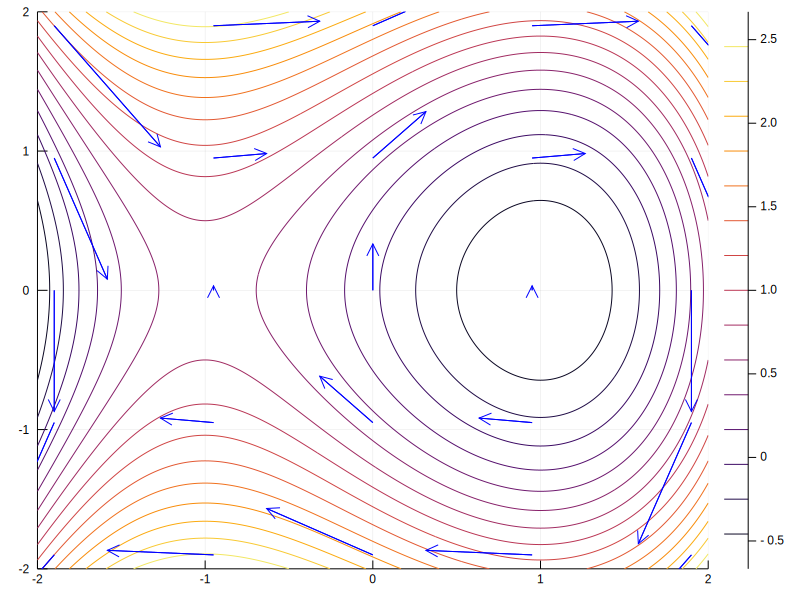

In [17]:
vector_field()

In [9]:
function plot_point(s, e, n = 30)
    points = range(s, stop=e, length=n)
    fig = plot(reuse = false, legend=false)
    for x_1 in points
        x0 = [x_1, 0.0]
        tspan = (0.0, 10.0)
        prob =  ODEProblem(x_dot_ode, x0, tspan)
        sol = solve(prob)
        plot!(sol, vars=(0, 1), color = :blue)
    end
    png(fig, "manifolds.png")
    return fig
end

plot_point (generic function with 2 methods)

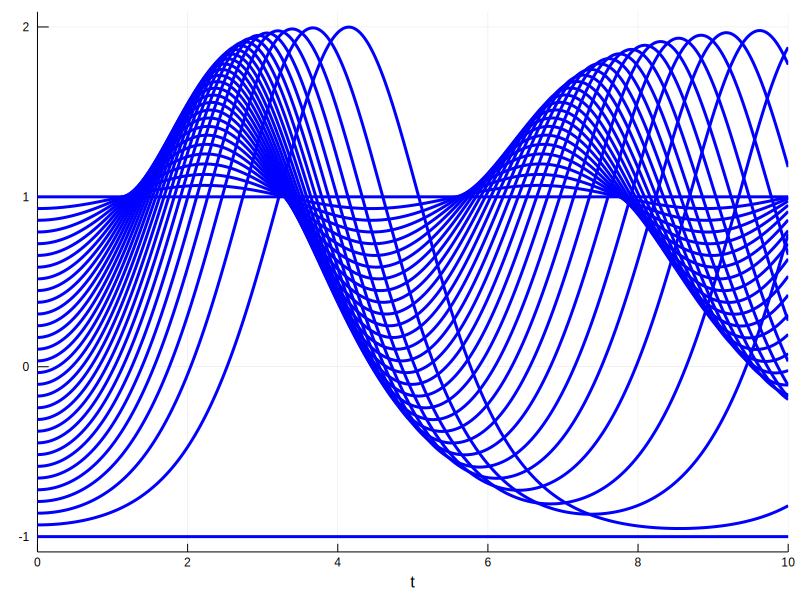

In [10]:
plot_point(-1.0, 1.0)

In [130]:
function plot_s(x_1, x_2, t)
    x0 = [x_1, x_2]
    tspan = (0.0, t)
    prob = ODEProblem(x_dot_ode, x0, tspan)
    sol = solve(prob)
    
    plot(sol, vars=(1,2), color=:red, legend=false)
    for step in 0.1:0.1:1.0
      upper = ODEProblem(x_dot_ode, [x_1, x_2 - step], tspan)
      plot!(solve(upper), vars=(1,2),color=:blue)
      
      lower = ODEProblem(x_dot_ode, [x_1, x_2 + step], tspan)
      plot!(solve(lower), vars=(1,2), color=:blue)
    end
        
    xlims!(-3, 3)
    ylims!(-3, 3)
    
    png("stable_manifold_approx.png")
end

plot_s (generic function with 1 method)

In [131]:
plot_s(-2, 1.6329924906907485, 100.0)

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/nofishlikeian/.julia/packages/DiffEqBase/n1pGb/src/integrator_interface.jl:162
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/nofishlikeian/.julia/packages/DiffEqBase/n1pGb/src/integrator_interface.jl:162
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/nofishlikeian/.julia/packages/DiffEqBase/n1pGb/src/integrator_interface.jl:162
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/nofishlikeian/.julia/packages/DiffEqBase/n1pGb/src/integrator_interface.jl:162
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unsta